Importacion de librerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.exceptions import FitFailedWarning, ConvergenceWarning
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.cluster import KMeans
from sklearn.metrics import roc_curve, auc, RocCurveDisplay, precision_recall_curve, average_precision_score, recall_score, precision_score
from imblearn.over_sampling import RandomOverSampler, SMOTE

from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter

from folium import Map, Marker, Icon
from folium.plugins import MarkerCluster




## Regiones

In [ ]:
warnings.simplefilter('ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FitFailedWarning)

In [ ]:
#!gdown https://drive.google.com/uc?id=1Sii6XCuwZ_Qvkb9DBk_6OV59H2wPHilQ

Downloading...
From: https://drive.google.com/uc?id=1Sii6XCuwZ_Qvkb9DBk_6OV59H2wPHilQ
To: /content/weatherAUS.csv
100% 14.1M/14.1M [00:00<00:00, 203MB/s]


In [ ]:
### carga datos de dataset en dataframe


file_path = "weatherAUS.csv"
df = pd.read_csv(file_path)

In [ ]:
df.shape

(145460, 23)

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [ ]:
df['Location'].value_counts()

,count
Location,
Canberra,3436
Sydney,3344
Adelaide,3193
Darwin,3193
Hobart,3193
Perth,3193
Melbourne,3193
Brisbane,3193
Albury,3040


In [ ]:
print(f"El dataset cuenta con {df.shape[0]} registros y {df.shape[1]} variables.")

El dataset cuenta con 145460 registros y 23 variables.


In [ ]:
prueba = df['Location'].apply(SepararPalabras)
prueba.value_counts()

,count
Location,
Canberra,3436
Sydney,3344
Adelaide,3193
Darwin,3193
Hobart,3193
Perth,3193
Melbourne,3193
Brisbane,3193
Albury,3040


Regiones

In [ ]:
ciudades = df['Location'].unique()
print(ciudades)
len(ciudades)

['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']


49

In [ ]:
# Creamos esta función para separar las palabras de las ciudades con nombres compuestos para que Geopy funcione
def SepararPalabras(cadena: str) -> str:
  """
  Recibe una cadena y le agrega espacios antes de cada mayúscula,
  exceptuando el primer caracter. Devuelve la cadena trasnformada.
  """
  resultado = ""
  for i, caracter in enumerate(cadena):
    #no es el primer caracter and El caracter es Mayuscula  and el anterior al caracter donde estoy es minuscula Porque sino rompe con RAAF no seque
    if i > 0 and caracter.isupper() and cadena[i-1].islower():
      resultado += " "
    resultado += caracter
  return resultado

In [ ]:
#Funcion falla si no se separa el nombre de las ciudades compuestas como PerthAirport
# Inicializar geolocalizador
geolocator = Nominatim(user_agent="climate_region_clustering",timeout = 5) #Timeout = 5 para evitar los warnings
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)  # evita baneos por rate limit
# Obtener coordenadas
coords = []
contador = 0
for ciudad in ciudades:
  location = geocode(f"{SepararPalabras(ciudad)}, Australia")
  if location:
    lat = location.latitude
    lon = location.longitude
    coords.append((ciudad, lat, lon))
    contador += 1
  else:
    print(f"No se encontró: {ciudad}")
    coords.append((ciudad, None, None))

df_coords = pd.DataFrame(coords, columns=["Location", "Latitude", "Longitude"])
print(f"Se cargaron correctamente {contador} ciudades.")

Se cargaron correctamente 49 ciudades.


In [ ]:
df_coords

,Location,Latitude,Longitude
0,Albury,-36.073773,146.913526
1,BadgerysCreek,-33.883145,150.742466
2,Cobar,-31.966663,145.304505
3,CoffsHarbour,-30.298600,153.109412
4,Moree,-29.461720,149.840715
5,Newcastle,-32.919295,151.779535
6,NorahHead,-33.281667,151.567778
7,NorfolkIsland,-29.032804,167.948314
8,Penrith,-33.751195,150.694171
9,Richmond,-37.807450,144.990721


In [ ]:
map = Map(location=[-25.0, 133.0], zoom_start=4)
for _, row in df_coords.iterrows():
  Marker(location=[row['Latitude'], row['Longitude']], popup=row['Location'], icon=Icon()).add_to(map)
map

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
# Aplicar KMeans sobre latitud y longitud
#Cantidad de Klusters no estoy seguro si lo tenemos que hacer basandonos en algo mas adelante cuando ya tenemos el modelo hecho

kmeans = KMeans(n_clusters=12, random_state=42, n_init=10)
df_coords["Region"] = kmeans.fit_predict(df_coords[["Latitude", "Longitude"]])

In [ ]:
colores = ['red','blue','black','pink','white','green','darkred', 'darkblue','purple', 'orange', 'gray', 'beige']

map = Map(location=[-25.0, 133.0], zoom_start=4)
for _, row in df_coords.iterrows():
  # Elegir el color según el cluster
  color = colores[row['Region'] % len(colores)]
  Marker(location=[row['Latitude'], row['Longitude']], popup=f"{row['Location']} (Cluster {row['Region']})", icon=Icon(color=color)).add_to(map)
map

In [ ]:
# Agregar Region al df original
df = df.merge(df_coords[['Location', 'Region']], on='Location', how='left')

In [ ]:
df['Region'].value_counts()

,count
Region,
9,24493
3,21309
1,21267
0,18573
7,12251
8,12220
11,10636
10,6233
4,6080



## Analisis Descriptivo


El dataset weatherAUS.csv contiene información climática de Australia de los
últimos diez años.

---

Variables:

1.   **Date**: fecha del registro climático.
2.   **Location**: localidad donde se obtuvo la observación.
1.   **MinTemp**: temperatura mínima del día (*°C*).
2.   **MaxTemp**: temperatura máxima del día (*°C*).
1.   **Rainfall**: cantidad de lluvia registrada en el día (*mm*).
2.   **Evaporation**: evaporación del día (*mm*)
1.   **Sunshine**: número de horas soleadas del día.
2.   **WindGustDir**: dirección de la ráfaga de viento más fuerte del día.
1.   **WindGustSpeed**: velocidad de la ráfaga de viento más fuerte del día (*km/h*).
2.   **WindDir9am**: dirección del viento a las 9 a.m.
1.   **WindDir3pm**: dirección del viento a las 3 p.m.
2.   **WindSpeed9am**: velocidad del viento a las 9 a.m. (*km/h*).
1.   **WindSpeed3pm**: velocidad del viento a las 3 p.m. (*km/h*).
2.   **Humidity9am**: humedad a las 9 a.m. (*%*).
1.   **Humidity3pm**: humedad a las 3 p.m. (*%*).
2.   **Pressure9am**: presión atmosférica a las 9 a.m. (*hpa*).
1.   **Pressure3pm**: presión atmosférica a las 3 p.m. (*hpa*).
2.   **Cloud9am**: nubosidad a las 9 a.m. (*octavos*).
1.   **Cloud3pm**: nubosidad a las 3 p.m. (*octavos*).
2.   **Temp9am**: temperatura a las 9 a.m. (*°C*).
1.   **Temp3pm**: temperatura a las 3 p.m. (*°C*).
2.   **RainToday**: Booleano. '*Yes*' si llovió, '*No*' en caso contrario.
1.   **RainTomorrow**: Booleano. '*Yes*' si llovió, '*No*' en caso contrario.

---
**Region**:
variable categorica Agregada en funcion de a que grupo pertence la ciudad dependiendo de sus coordenadas

Eliminamos las filas que tienen muchos (10 o más) valores nulos en simultaneo ya que son cerca de 2800 lo que representa menos del 2% de los datos

In [ ]:
print(f"Cant filas con más de 10 valores nulos: {len(df[df.isna().sum(axis=1) > 10])}")
print(f"Porcentaje de filas con mas de 10 valores nulos: {len(df[df.isna().sum(axis=1) > 10])/len(df):.2%}")
df = df[df.isna().sum(axis=1) < 11]


Cant filas con más de 10 valores nulos: 2789
Porcentaje de filas con mas de 10 valores nulos: 1.92%


In [ ]:
categoricas = [var for var in df.columns if df[var].dtype=='O']
print(f"El dataset tiene {len(categoricas)} variables categóricas.\n{categoricas}")

El dataset tiene 7 variables categóricas.
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [ ]:
print(df[categoricas].isnull().sum())
#Elimino las filas en las que RainTomorrow = null ya que es la variable objetivo y no tiene sentido imputar valores sobre ella
df = df.dropna(subset=['RainTomorrow'])


Date               0
Location           0
WindGustDir     8225
WindDir9am      8835
WindDir3pm      2258
RainToday       2141
RainTomorrow    2273
dtype: int64


In [ ]:
print(df[categoricas].isnull().sum())

In [ ]:
# Pasamos la variable Date a tipo datetime64
# Creamos tres nuevas variables "Year", "Month" y "Day"  y eliminamos la variable original
df["Date"] = pd.to_datetime(df["Date"])

df["Year"] = pd.to_datetime(df["Date"]).dt.year
df["Month"] = pd.to_datetime(df["Date"]).dt.month
df["Day"] = pd.to_datetime(df["Date"]).dt.day

#df.drop('Date', axis=1, inplace = True)

In [ ]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Region,Year,Month,Day
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,8.0,NaN,16.9,21.8,No,No,0,2008,12,1
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,NaN,NaN,17.2,24.3,No,No,0,2008,12,2
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,NaN,2.0,21.0,23.2,No,No,0,2008,12,3
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,NaN,NaN,18.1,26.5,No,No,0,2008,12,4
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,7.0,8.0,17.8,29.7,No,No,0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,NaN,NaN,9.4,20.9,No,No,2,2017,6,20
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,NaN,NaN,10.1,22.4,No,No,2,2017,6,21
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,NaN,NaN,10.9,24.5,No,No,2,2017,6,22
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,NaN,NaN,12.5,26.1,No,No,2,2017,6,23


Creamos variable Estación.
En australia cambian el 1 en vez del 21

In [ ]:
def asignar_estacion(mes):
    if mes in [12, 1, 2]:
        return 'Summer'
    elif mes in [3, 4, 5]:
        return 'Autumn'
    elif mes in [6, 7, 8]:
        return 'Winter'
    else:
        return 'Spring'

df['Season'] = df['Month'].apply(asignar_estacion)
#Podemos eliminar el Month lo dejo por si lo volvemos a usar mas adelante
# df.drop('Month', axis=1, inplace = True)

La variable Location es categorica pero vamos a usar la creada Region (No aparece como categorica porque se puso como entero pero es una variable categorica)

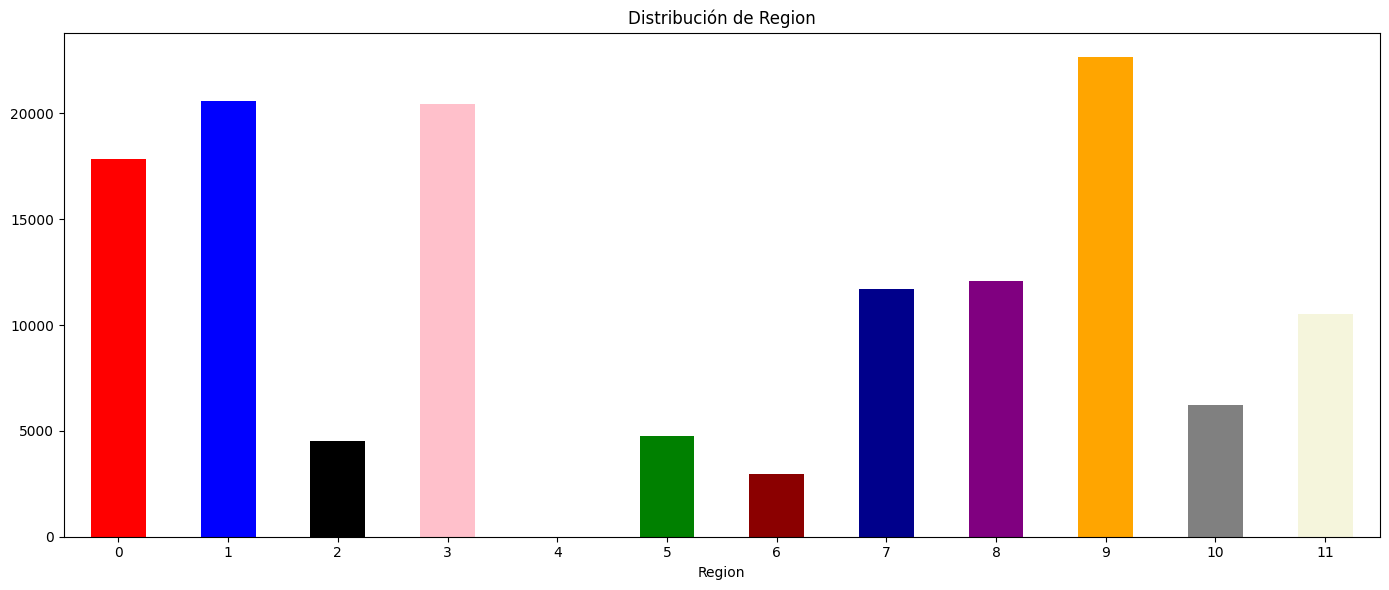

In [ ]:
df['Region'].value_counts().sort_index().plot(kind='bar', figsize=(14, 6), color=colores)
plt.title("Distribución de Region")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
df['Region'] = df['Region'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140398 entries, 0 to 145458
Data columns (total 28 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           140398 non-null  datetime64[ns]
 1   Location       140398 non-null  object        
 2   MinTemp        140131 non-null  float64       
 3   MaxTemp        140217 non-null  float64       
 4   Rainfall       139237 non-null  float64       
 5   Evaporation    81105 non-null   float64       
 6   Sunshine       74348 non-null   float64       
 7   WindGustDir    132673 non-null  object        
 8   WindGustSpeed  132730 non-null  float64       
 9   WindDir9am     131683 non-null  object        
 10  WindDir3pm     138172 non-null  object        
 11  WindSpeed9am   140022 non-null  float64       
 12  WindSpeed3pm   139307 non-null  float64       
 13  Humidity9am    139128 non-null  float64       
 14  Humidity3pm    137852 non-null  float64       
 15  Press

Variables Numericas

In [ ]:
colums_num = df.select_dtypes(include=[np.number]).columns.tolist()
colums_num.remove('Year')
colums_num.remove('Month')
colums_num.remove('Day')
df_num = df[colums_num]
df_num.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,140131.000000,140217.000000,139237.000000,81105.000000,74348.000000,132730.000000,140022.000000,139307.000000,139128.000000,137852.000000,128105.000000,128089.000000,87768.000000,85033.000000,139974.000000,138722.000000
mean,12.189084,23.231610,2.341913,5.468002,7.624739,39.979108,14.031709,18.642164,68.824040,51.475278,1017.653054,1015.258150,4.440081,4.503452,16.982772,21.695417
std,6.403174,7.116195,8.426729,4.190154,3.781486,13.584677,8.867310,8.801675,19.073627,20.792876,7.105174,7.036359,2.885344,2.720563,6.499842,6.933308
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.800000,28.300000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,87.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000


Se puede observar lo siguiente:
* Temperatura: contiene valores posibles
* Rainfall: para el 50% de los días no llovió
* Humedad: valores entre 0-100%
* Viento: velocidad variable, con ráfagas de hasta 130 km/h
* Presion atmosferica: sin valores extraños, en un rango 980-1050 hPa

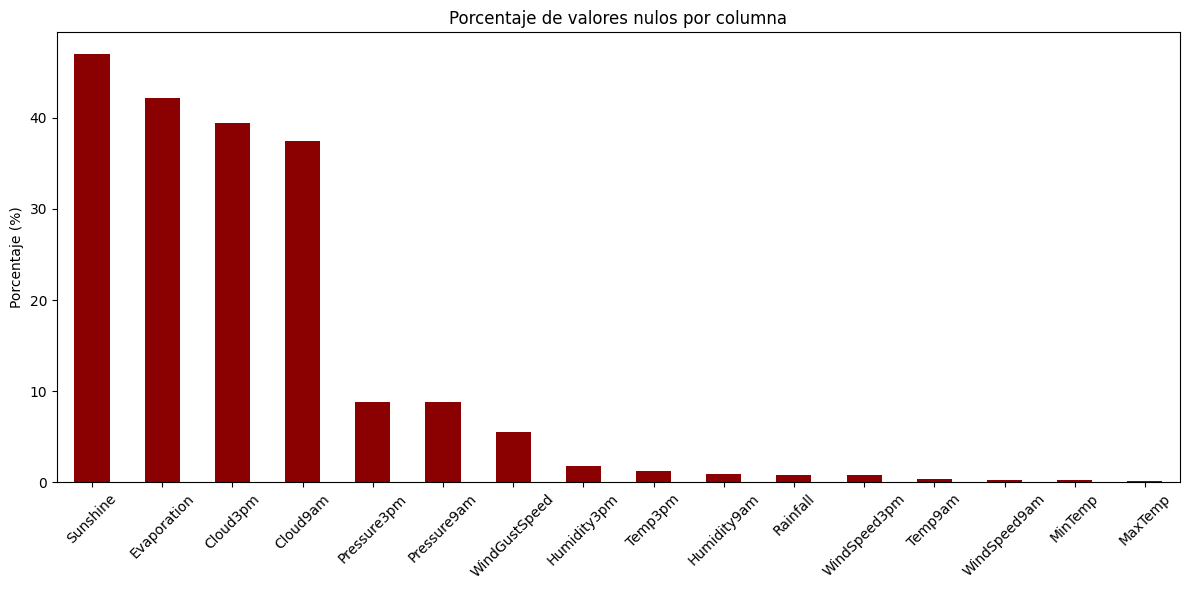

In [ ]:
porcentaje_nulos = df_num.isna().sum() / len(df_num) * 100

plt.figure(figsize=(12, 6))
porcentaje_nulos.sort_values(ascending=False).plot(kind='bar', color='darkred')
plt.title('Porcentaje de valores nulos por columna')
plt.ylabel('Porcentaje (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Gran cantidad de nulos en las siguientes variables:

```
Evaporation	Sunshine Cloud9am Cloud3pm
```



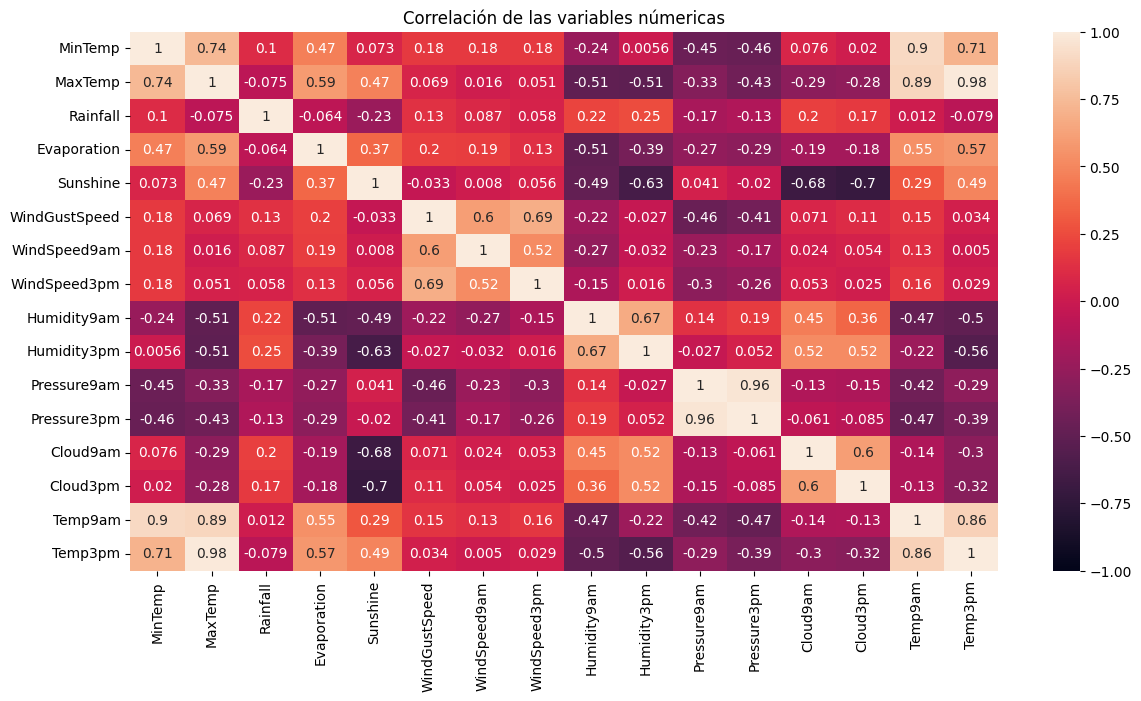

In [ ]:
plt.figure(figsize=(14,7))
sns.heatmap(df_num.corr(), vmax=1, vmin=-1, annot=True)
plt.title('Correlación de las variables númericas');

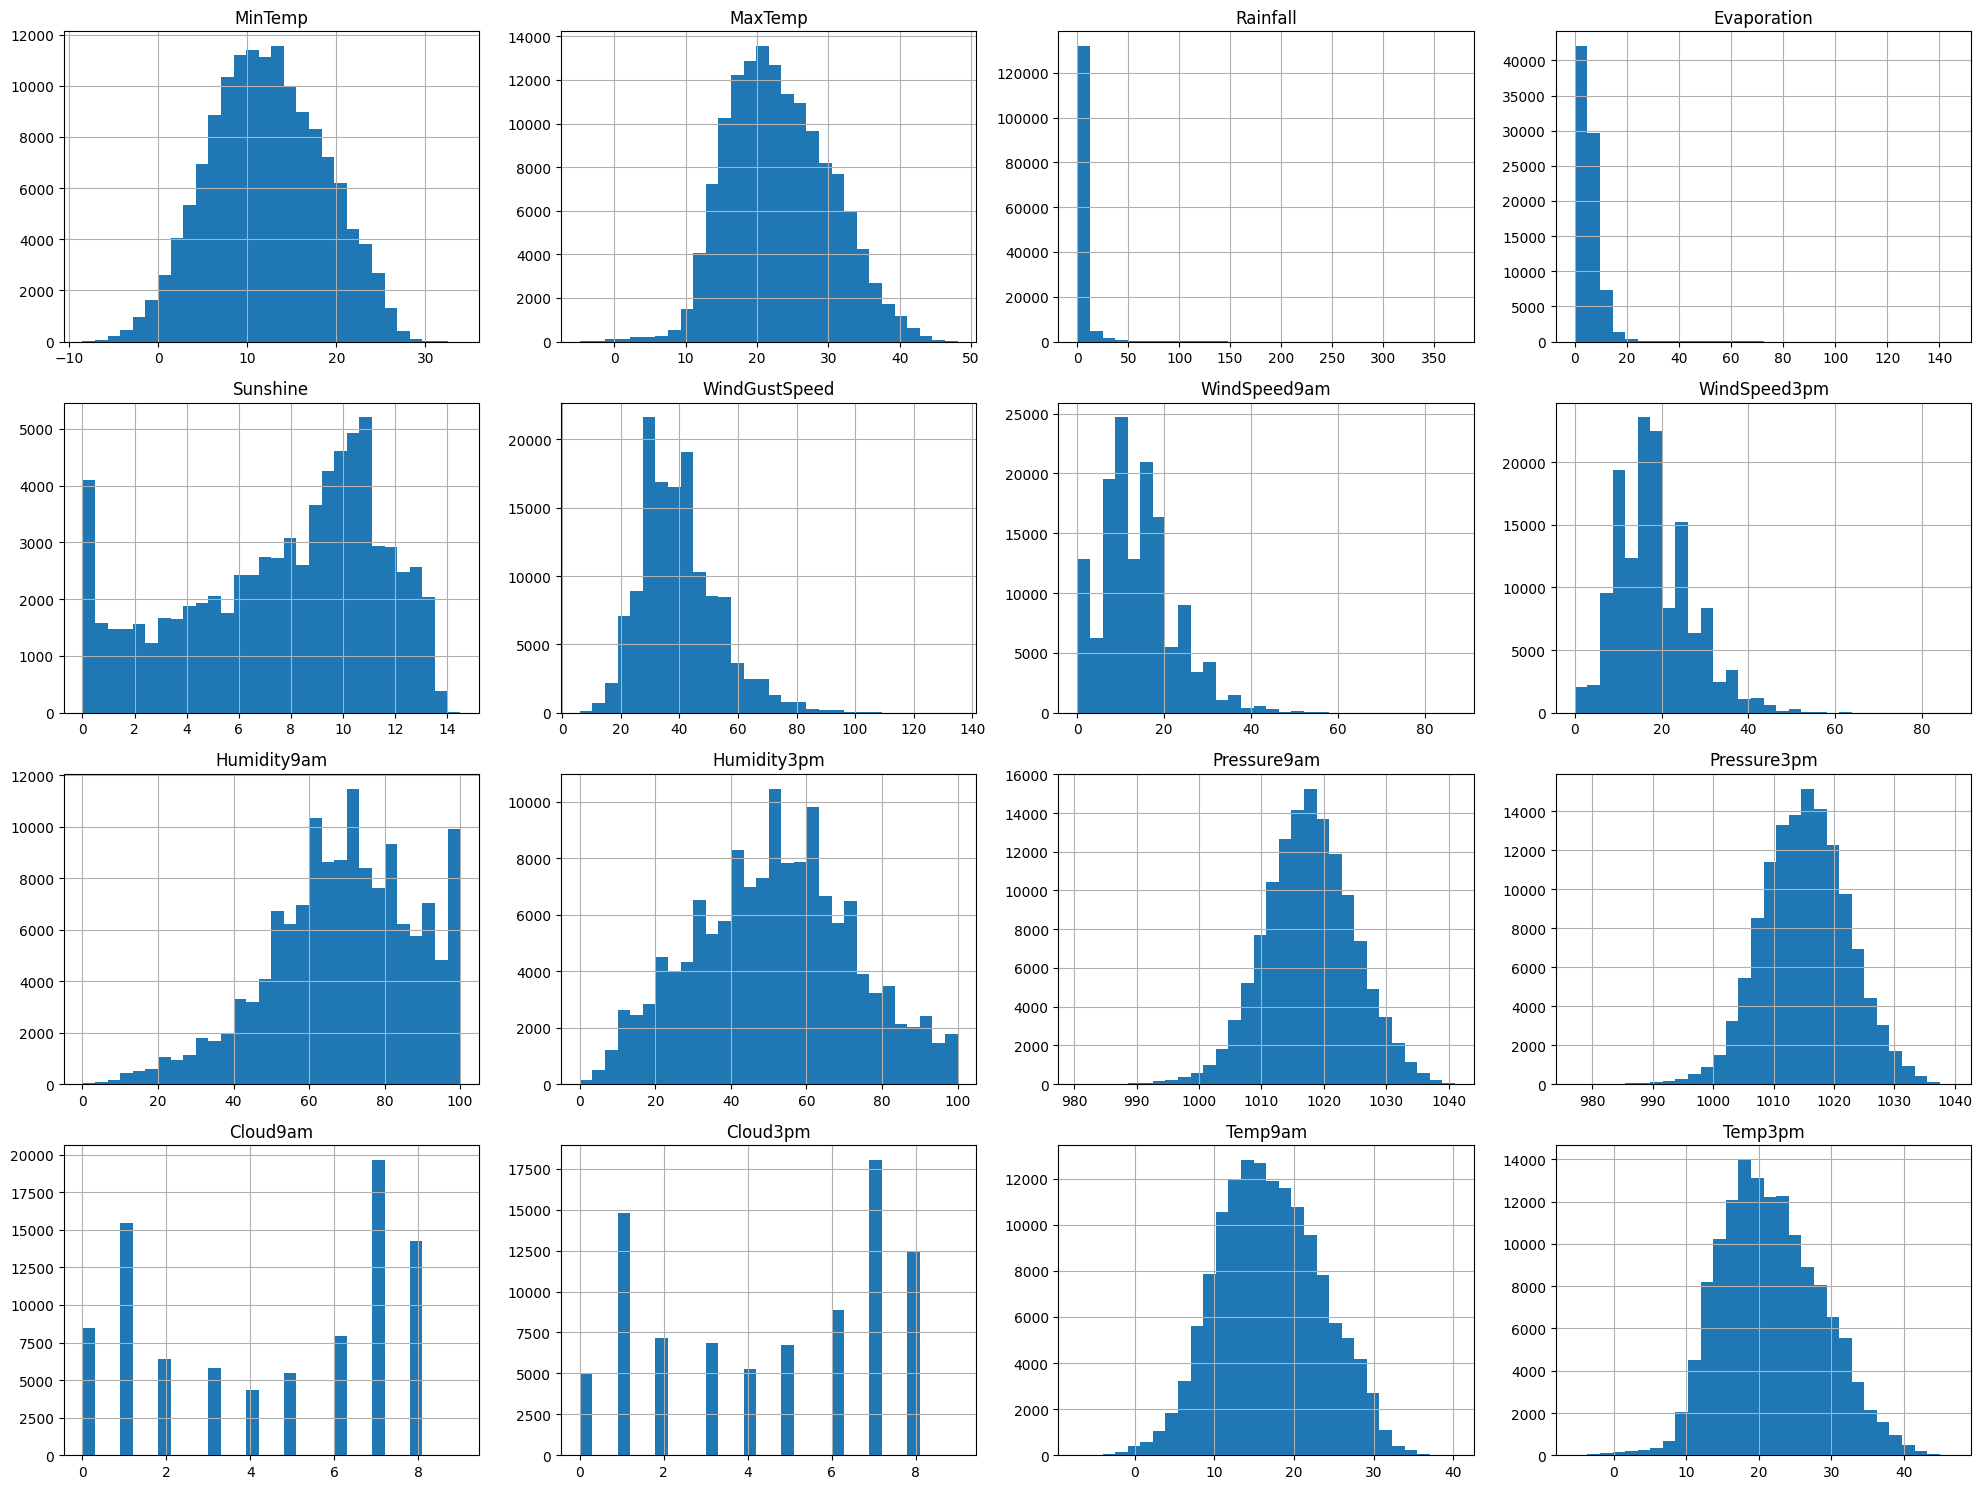

In [ ]:
df_num.hist(figsize=(20, 15), bins=30, layout=(-1, 4))
plt.tight_layout()

####Wind variables

In [ ]:
Grafico de frecuencia por cada valor unico de direccion para las 3 variables de viento

SyntaxError: invalid syntax (ipython-input-269815240.py, line 1)

In [ ]:
for var in ['WindDir3pm','WindGustDir','WindDir9am']:
  print(df[var].unique())

['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']
['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 nan 'E' 'SSW']
['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']


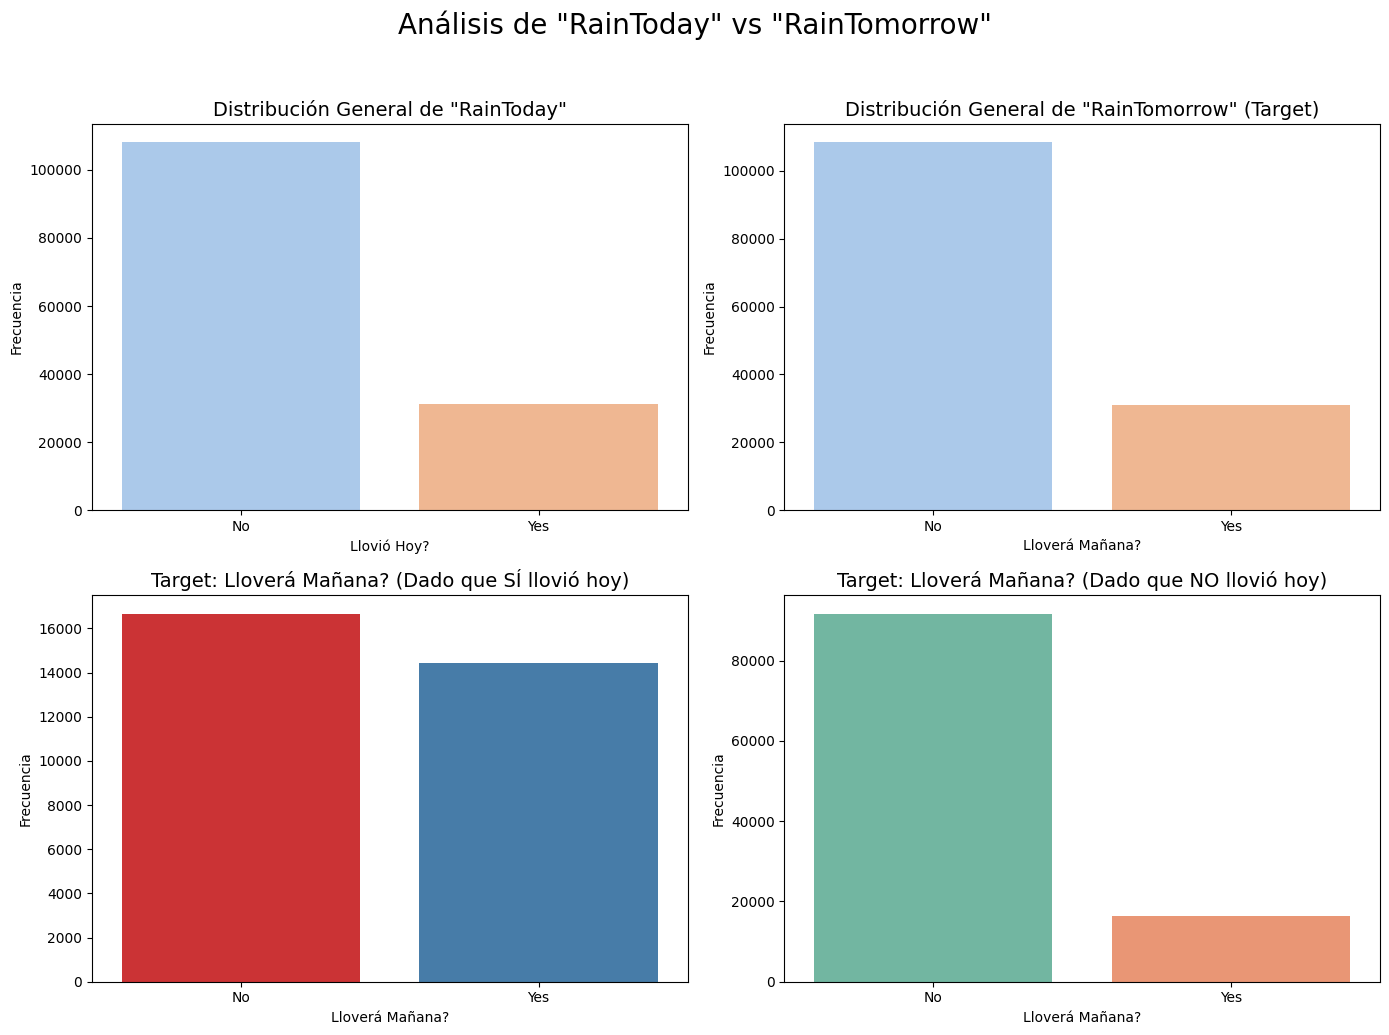

In [ ]:
df_cleaned = df.dropna(subset=['RainToday', 'RainTomorrow'])
plt.figure(figsize=(14, 10))

# 1. Distribución General de RainToday
plt.subplot(2, 2, 1)
sns.countplot(x='RainToday', data=df_cleaned, palette='pastel')
plt.title('Distribución General de "RainToday"', fontsize=14)
plt.xlabel('Llovió Hoy?')
plt.ylabel('Frecuencia')

# 2. Distribución General de RainTomorrow
plt.subplot(2, 2, 2)
sns.countplot(x='RainTomorrow', data=df_cleaned, palette='pastel')
plt.title('Distribución General de "RainTomorrow" (Target)', fontsize=14)
plt.xlabel('Lloverá Mañana?')
plt.ylabel('Frecuencia')

# 3. Distribución de RainTomorrow CUANDO RainToday == 'Yes'
plt.subplot(2, 2, 3)
sns.countplot(x='RainTomorrow',
              data=df_cleaned[df_cleaned['RainToday'] == 'Yes'],
              palette='Set1')
plt.title('Target: Lloverá Mañana? (Dado que SÍ llovió hoy)', fontsize=14)
plt.xlabel('Lloverá Mañana?')
plt.ylabel('Frecuencia')

# 4. Distribución de RainTomorrow CUANDO RainToday == 'No'
plt.subplot(2, 2, 4)
sns.countplot(x='RainTomorrow',
              data=df_cleaned[df_cleaned['RainToday'] == 'No'],
              palette='Set2')
plt.title('Target: Lloverá Mañana? (Dado que NO llovió hoy)', fontsize=14)
plt.xlabel('Lloverá Mañana?')
plt.ylabel('Frecuencia')

plt.suptitle('Análisis de "RainToday" vs "RainTomorrow"', fontsize=20, y=1.03)
plt.tight_layout()
plt.show()

Vemos que si llueve hoy (Gráfico 3) la probabilidad de que llueva mañana aumenta, en cambio, si no llueve hoy (Gráfico 4) es muy probable que no llueva mañana.


In [ ]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140398 entries, 0 to 145458
Data columns (total 28 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           140398 non-null  datetime64[ns]
 1   Location       140398 non-null  category      
 2   MinTemp        140131 non-null  float64       
 3   MaxTemp        140217 non-null  float64       
 4   Rainfall       139237 non-null  float64       
 5   Evaporation    81105 non-null   float64       
 6   Sunshine       74348 non-null   float64       
 7   WindGustDir    132673 non-null  category      
 8   WindGustSpeed  132730 non-null  float64       
 9   WindDir9am     131683 non-null  category      
 10  WindDir3pm     138172 non-null  category      
 11  WindSpeed9am   140022 non-null  float64       
 12  WindSpeed3pm   139307 non-null  float64       
 13  Humidity9am    139128 non-null  float64       
 14  Humidity3pm    137852 non-null  float64       
 15  Press

In [ ]:
x = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 112318 entries, 94054 to 126707
Data columns (total 27 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           112318 non-null  datetime64[ns]
 1   Location       112318 non-null  category      
 2   MinTemp        112114 non-null  float64       
 3   MaxTemp        112170 non-null  float64       
 4   Rainfall       111381 non-null  float64       
 5   Evaporation    64896 non-null   float64       
 6   Sunshine       59369 non-null   float64       
 7   WindGustDir    106122 non-null  category      
 8   WindGustSpeed  106169 non-null  float64       
 9   WindDir9am     105304 non-null  category      
 10  WindDir3pm     110527 non-null  category      
 11  WindSpeed9am   112015 non-null  float64       
 12  WindSpeed3pm   111430 non-null  float64       
 13  Humidity9am    111294 non-null  float64       
 14  Humidity3pm    110249 non-null  float64       
 15  P

Se rellenan los valores NaN de las temperaturas

In [ ]:
print(f'nulos MinTemp: {x_train["MinTemp"].isna().sum()}')
print(f'nulos MaxTemp: {x_train["MaxTemp"].isna().sum()}')
print(f'nulos MinTemp test: {x_test["MinTemp"].isna().sum()}')
print(f'nulos MaxTemp test: {x_test["MaxTemp"].isna().sum()}')
#print(f'nulos Temp9am: {X_train["Temp9am"].isna().sum()}')
#print(f'Cantidad de valtantes Temp3pm: {X_train["Temp3pm"].isna().sum()

nulos MinTemp: 11
nulos MaxTemp: 5
nulos MinTemp test: 63
nulos MaxTemp test: 33


In [ ]:
# verificar porque no rellena
mean_min_temp = x_train.groupby(['Date', 'Region'])['MinTemp'].transform('mean')

x_train["MinTemp"] = x_train["MinTemp"].fillna(mean_min_temp)
x_test["MinTemp"] = x_test["MinTemp"].fillna(mean_min_temp)

mean_max_temp = x_train.groupby(['Date', 'Region'])['MaxTemp'].transform('mean')

x_train['MaxTemp'] = x_train['MaxTemp'].fillna(mean_max_temp)
x_test['MaxTemp'] = x_test['MaxTemp'].fillna(mean_max_temp)

print(f'nulos MinTemp: {x_train["MinTemp"].isna().sum()}')
print(f'nulos MaxTemp: {x_train["MaxTemp"].isna().sum()}')
print(f'nulos MinTemp test: {x_test["MinTemp"].isna().sum()}')
print(f'nulos MaxTemp test: {x_test["MaxTemp"].isna().sum()}')

nulos MinTemp: 11
nulos MaxTemp: 5
nulos MinTemp test: 63
nulos MaxTemp test: 33


In [ ]:
# representar los vientos con sin y cos, imputar faltantes antes o despues?
wind_dir_to_deg = {
    'N': 0, 'NNE': 22.5, 'NE': 45, 'ENE': 67.5, 'E': 90,
    'ESE': 112.5, 'SE': 135, 'SSE': 157.5, 'S': 180,
    'SSW': 202.5, 'SW': 225, 'WSW': 247.5, 'W': 270,
    'WNW': 292.5, 'NW': 315, 'NNW': 337.5
}

for col in ['WindGustDir', 'WindDir9am', 'WindDir3pm']:
    x_train[col + '_sin'] = x_train[col].map(wind_dir_to_deg).apply(lambda x: np.sin(np.deg2rad(x)))
    x_train[col + '_cos'] = x_train[col].map(wind_dir_to_deg).apply(lambda x: np.cos(np.deg2rad(x)))
    x_test[col + '_sin'] = x_test[col].map(wind_dir_to_deg).apply(lambda x: np.sin(np.deg2rad(x)))
    x_test[col + '_cos'] = x_test[col].map(wind_dir_to_deg).apply(lambda x: np.cos(np.deg2rad(x)))

In [ ]:
# escalar variables
model = LogisticRegression(random_state=42, class_weight='balanced')

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

accuracy_logreg = accuracy_score(y_test, y_pred)

confusion_matrix_logreg = confusion_matrix(y_test, y_pred)

classification_report_logreg = classification_report(y_test, y_pred)

print("Métricas para logreg:")
print(f'Exactitud: {accuracy_logreg}')
print("Matriz de confusión:")
print(confusion_matrix_logreg)
print("Reporte de clasificación:")
print(classification_report_logreg)